In [30]:
import numpy as np
data = np.load("sgd_1024_trajs_linreg_200000_alpha_0.05.npz", allow_pickle=True)

In [31]:
theta_hat_histories = data['theta_hat_histories']
theta_true = data['theta_true']
alpha = data['alpha']

In [32]:
theta_true

array([ 1. ,  1. , -0.1, -0.1, -0.1])

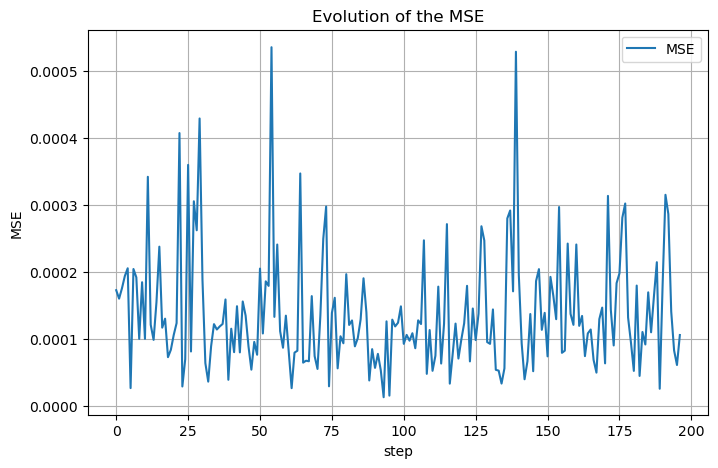

In [33]:
import matplotlib.pyplot as plt

mse = np.sum((theta_hat_histories[0][3:] - theta_true)**2, axis=1) 
mse.shape
plt.figure(figsize=(8,5))
plt.plot(mse, label="MSE")
plt.xlabel("step")
plt.ylabel("MSE")
plt.title("Evolution of the MSE")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

def kolmogorov_distance_to_normal(data, a, k):
    sample_sort = np.sort(data)
    n = sample_sort.shape[0]
    ecdf = np.linspace(0,1,n+1)
    # s_n = 0.02/np.sqrt(2)
    x = np.arange(2000001)
    x = x[999::10000]
    s_n = 0.02 * np.sqrt((1-(1-(2*a))**(2*x[k]))/(2-(2*a)))
    cdfs = norm.cdf(sample_sort, loc = 0, scale = s_n)
    ks_dist = max([(ecdf[1:] - cdfs).max(), (cdfs - ecdf[:-1]).max()])

    return ks_dist

In [13]:
def data_to_proj(data, u, n_trajectories, a, theta_true):
    projections = data@ u          
    true_proj = theta_true @ u
    return (projections - true_proj)/np.sqrt(2*a)

    

In [14]:
def get_kd_alpha(u, theta_hat_histories, n_trajectories, a, theta_true):
    kd_s = []
    for n in range(3, theta_hat_histories.shape[1]):
        data = data_to_proj(theta_hat_histories[:, n,:], u, n_trajectories, a, theta_true)
        kd = kolmogorov_distance_to_normal(data, a, n)
        kd_s.append(kd)
    return kd_s

In [15]:
kd_s = []
kd_s_norm = []
rng = np.random.default_rng(12345)
u = rng.normal(size=5)
u /= np.linalg.norm(u) 
for a in  [1.0e-04, 2.0e-04, 1.0e-03, 2.0e-03, 1.0e-02, 1.8e-02, 6.0e-02, 1.0e-01, 1.2e-01]:#[0.000001, 0.000005, 0.00001,0.00003, 0.00005, 0.0001,0.0005, 0.001, 0.005, 0.009, 0.03, 0.05, 0.06, 0.1]:#0.0005, 0.001, 0.005, 0.009, 0.05]:
    data_a = np.load(f"sgd_1024_trajs_linreg_2000000_alpha_{a}_thetas.npz", allow_pickle=True)
    theta_hat_histories = data_a['theta_hat_histories']
    print(theta_hat_histories.shape)
    n_trajectories = theta_hat_histories.shape[0]
    theta_true = data_a['theta_true']
    kd = get_kd_alpha(u, theta_hat_histories, n_trajectories, a, theta_true)
    kd_s.append(kd)
    kd_s_norm.append(kd/np.sqrt(2*a))

(1024, 200, 5)
(1024, 200, 5)
(1024, 200, 5)
(1024, 200, 5)
(1024, 200, 5)
(1024, 200, 5)
(1024, 200, 5)
(1024, 200, 5)
(1024, 200, 5)


In [16]:
kd_s_norm[0].shape

(197,)

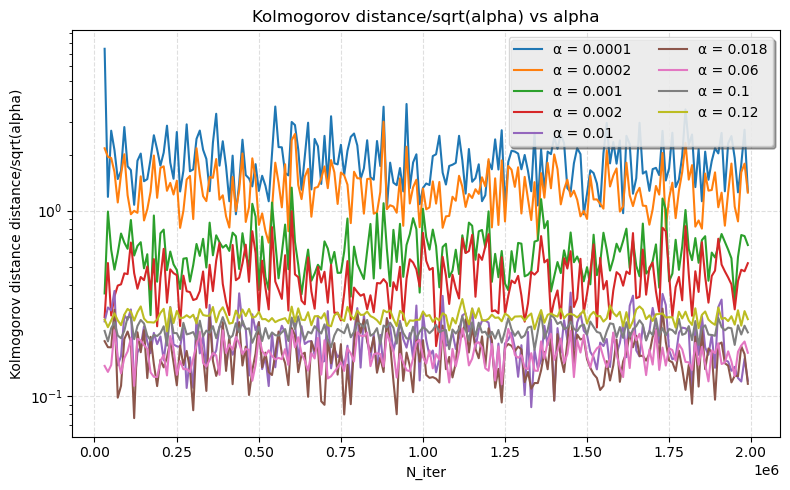

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))

alphas = np.array([1.0e-04, 2.0e-04, 1.0e-03, 2.0e-03, 1.0e-02, 1.8e-02, 6.0e-02, 1.0e-01, 1.2e-01])#np.array([0.000001, 0.000005, 0.00001,0.00003, 0.00005, 0.0001,0.0005, 0.001, 0.005, 0.009, 0.03, 0.05, 0.06, 0.1])

# предполагаем, что kd_s_norm — это список из 5 массивов одинаковой длины
# например kd_s_norm[a].shape == (K,)
# тогда ось X можно делать через np.arange(len(kd_s_norm[a]))

for a in range(len(alphas)):
    y = kd_s_norm[a]
    x = np.arange(2000001)
    x = x[999::10000][3:]     # корректная ось X
    ax.plot(x, y, label=f"α = {alphas[a]}")

# легенда
leg = ax.legend(loc='best', ncol=2, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.8)

# подписи и сетка
ax.set_xlabel("N_iter")
ax.set_ylabel("Kolmogorov distance distance/sqrt(alpha)")
ax.set_title("Kolmogorov distance/sqrt(alpha) vs alpha")
ax.grid(True, linestyle="--", alpha=0.4)
ax.set_yscale('log')

plt.tight_layout()
plt.show()

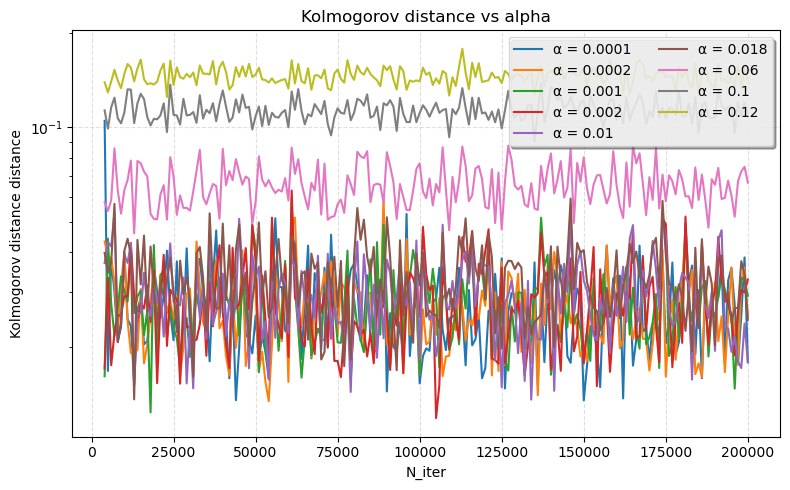

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))

alphas = np.array([1.0e-04, 2.0e-04, 1.0e-03, 2.0e-03, 1.0e-02, 1.8e-02, 6.0e-02, 1.0e-01, 1.2e-01])#np.array([0.000001, 0.000005, 0.00001,0.00003, 0.00005, 0.0001,0.0005, 0.001, 0.005, 0.009, 0.03, 0.05, 0.06, 0.1])

# предполагаем, что kd_s_norm — это список из 5 массивов одинаковой длины
# например kd_s_norm[a].shape == (K,)
# тогда ось X можно делать через np.arange(len(kd_s_norm[a]))

for a in range(len(alphas)):
    y = kd_s[a]
    x = np.arange(200001)
    x = x[999::1000][3:]     # корректная ось X
    ax.plot(x, y, label=f"α = {alphas[a]}")

# легенда
leg = ax.legend(loc='best', ncol=2, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.8)

# подписи и сетка
ax.set_xlabel("N_iter")
ax.set_ylabel("Kolmogorov distance distance")
ax.set_title("Kolmogorov distance vs alpha")
ax.grid(True, linestyle="--", alpha=0.4)
ax.set_yscale('log')

plt.tight_layout()
plt.show()

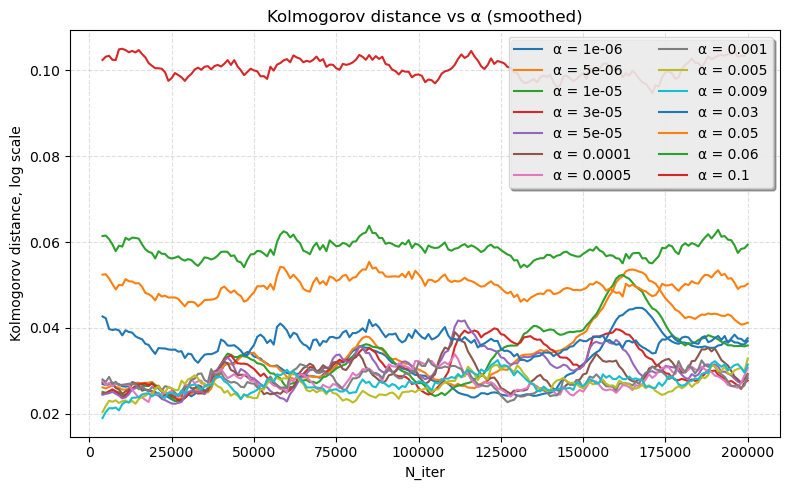

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def ema(y, alpha=0.1):
    """
    Экспоненциальное скользящее среднее.
    y    : 1D-массив значений
    alpha: параметр сглаживания в (0,1],
           чем больше alpha, тем меньше сглаживание.
    """
    y = np.asarray(y, dtype=float)
    if y.size == 0:
        return y

    z = np.zeros_like(y)
    z[0] = y[0]
    for t in range(1, len(y)):
        z[t] = alpha * y[t] + (1 - alpha) * z[t-1]
    return z

fig, ax = plt.subplots(figsize=(8, 5))

alphas = np.array([0.000001, 0.000005, 0.00001,0.00003, 0.00005, 0.0001,0.0005, 0.001, 0.005, 0.009, 0.03, 0.05, 0.06, 0.1])

for i, a in enumerate(alphas):
    y = kd_s[i]
    x = np.arange(200001)[999::1000][3:]

    # сглаживание
    y_smooth = ema(y)

    ax.plot(x, y_smooth, label=f"α = {a}")

# легенда
leg = ax.legend(loc='best', ncol=2, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.8)

# подписи и сетка
ax.set_xlabel("N_iter")
ax.set_ylabel("Kolmogorov distance, log scale")
ax.set_title("Kolmogorov distance vs α (smoothed)")
ax.grid(True, linestyle="--", alpha=0.4)
# ax.set_yscale('log')
plt.tight_layout()
plt.show()
fig.savefig("Kolmogorov distance_smoothed.pdf",format='pdf')


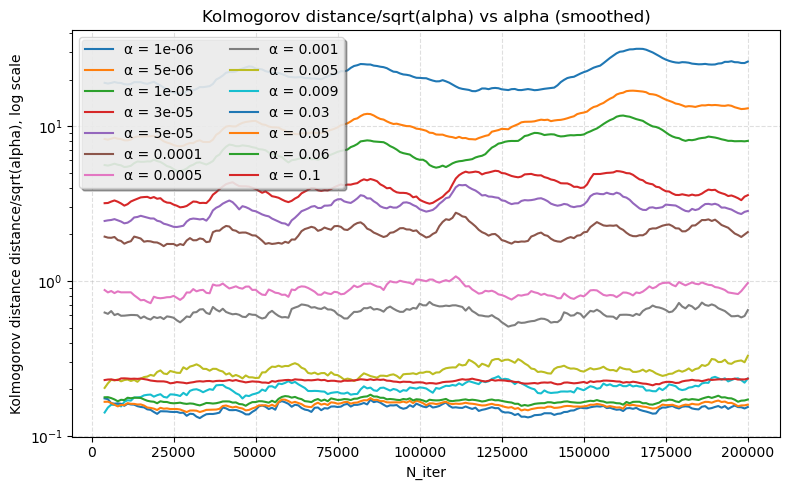

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))

alphas = np.array([0.000001, 0.000005, 0.00001,0.00003, 0.00005, 0.0001,0.0005, 0.001, 0.005, 0.009, 0.03, 0.05, 0.06, 0.1])

# предполагаем, что kd_s_norm — это список из 5 массивов одинаковой длины
# например kd_s_norm[a].shape == (K,)
# тогда ось X можно делать через np.arange(len(kd_s_norm[a]))

for a in range(len(alphas)):
    y = kd_s_norm[a]
    x = np.arange(200001)
    x = x[999::1000][3:]   
    y_smooth = ema(y)
    ax.plot(x, y_smooth, label=f"α = {alphas[a]}")

# легенда
leg = ax.legend(loc='best', ncol=2, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.8)

# подписи и сетка
ax.set_xlabel("N_iter")
ax.set_ylabel("Kolmogorov distance distance/sqrt(alpha), log scale")
ax.set_title("Kolmogorov distance/sqrt(alpha) vs alpha (smoothed)")
ax.grid(True, linestyle="--", alpha=0.4)
ax.set_yscale('log')

plt.tight_layout()
plt.show()
fig.savefig("Kolmogorov_distance_sqrt(alpha)_smoothed.pdf",format='pdf')

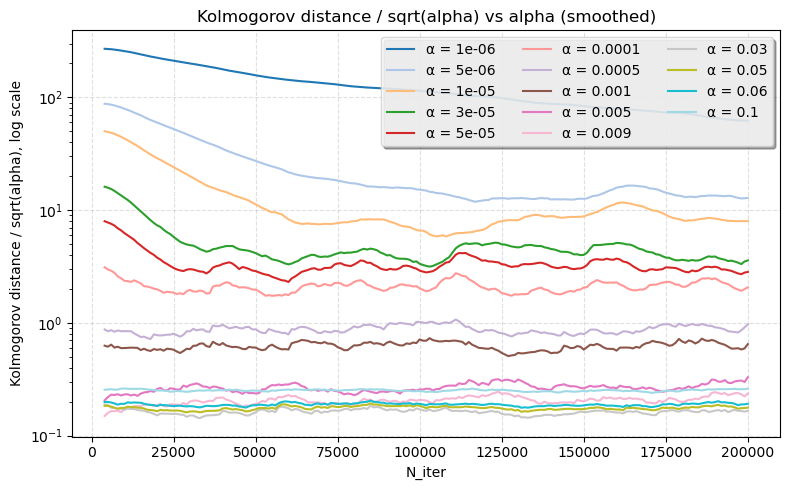

In [29]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))

alphas = np.array([0.000001, 0.000005, 0.00001, 0.00003, 0.00005,
                   0.0001, 0.0005, 0.001, 0.005, 0.009, 0.03,
                   0.05, 0.06, 0.1])

# берём colormap с большим числом различимых цветов
cmap = plt.get_cmap('tab20')  # можно попробовать 'tab20', 'tab20b', 'tab20c', 'viridis', 'plasma', ...
colors = cmap(np.linspace(0, 1, len(alphas)))

for i, a in enumerate(alphas):
    y = kd_s_norm[i]
    x = np.arange(200001)
    x = x[999::1000][3:]
    y_smooth = ema(y)

    ax.plot(x, y_smooth,
            label=f"α = {a}",
            color=colors[i])  # <-- задаём свой цвет

leg = ax.legend(loc='best', ncol=3, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.8)

ax.set_xlabel("N_iter")
ax.set_ylabel("Kolmogorov distance / sqrt(alpha), log scale")
ax.set_title("Kolmogorov distance / sqrt(alpha) vs alpha (smoothed)")
ax.grid(True, linestyle="--", alpha=0.4)
ax.set_yscale('log')

plt.tight_layout()
plt.show()
# fig.savefig("Kolmogorov_distance_sqrt(alpha)_smoothed.pdf", format='pdf')


In [10]:
np.array(kd_s)[2,-1]

0.13068005964730084

In [15]:
np.array(kd_s)[3,-69]

0.10449658632448228

In [25]:
X = rng.uniform(low=-np.sqrt(3), high=np.sqrt(3), size=(100000, 5))
noise = rng.normal(0.0, 0.1, size=100000)
theta_true = np.array([ 1. ,  1. , -0.1, -0.1, -0.1])
y = X.dot(theta_true) + noise  

In [26]:
rng = np.random.default_rng(12345)
u = rng.normal(size=5)
u /= np.linalg.norm(u) 

In [27]:
u.shape


(5,)

In [28]:
((X@u)**2).mean()

0.997464048243146

In [29]:
(noise**2).mean()

0.009989873066477886

In [21]:
np.linspace(100000,200000,11)

array([100000., 110000., 120000., 130000., 140000., 150000., 160000.,
       170000., 180000., 190000., 200000.])

In [26]:
N_s = np.linspace(100000,200000,6)
alphas = (np.log(N_s)/N_s) * 100

In [27]:
alphas

array([0.01151293, 0.00974604, 0.00846386, 0.00748933, 0.00672262,
       0.00610304])

In [30]:
print((2*np.array([0.00005, 0.0001,0.0005, 0.001, 0.005, 0.009, 0.03, 0.05, 0.06, 0.1])).astype(float))

[1.0e-04 2.0e-04 1.0e-03 2.0e-03 1.0e-02 1.8e-02 6.0e-02 1.0e-01 1.2e-01
 2.0e-01]


In [5]:
x = np.arange(200001)
x = x[999::1000]
x.shape

(200,)

In [22]:
e = 2.71828182846
С_d2 = np.sqrt(2*(0.02**2)*3)
C_d = np.sqrt(1*(0.02**2)*(2*3**3 + 4*3**2))
c_0 = 259*1*2*2*np.sqrt(2)/(3.14*((1-e**(-1))**(3/2)))
c_2 =( 2/((1-e**(-1))**(1/2)*0.02)) *(np.sqrt(3)*0.02)*(1 + np.sqrt(3))
c_4 = 2*C_d/((1-e**(-1))**(1/2)) + 4*С_d2*(np.sqrt(3.14)/2)/((1-e**(-1))**(1/2))

In [23]:
c_0 + c_2 + c_4

941.0208850288295

In [32]:
np.arange(2000001)[999::10000][3:].shape

(197,)